In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Orders Data 

orders_dataset = pd.read_csv('Data/olist_orders_dataset.csv')
customer_dataset = pd.read_csv('Data/olist_customers_dataset.csv')
order_item = pd.read_csv("Data/olist_order_items_dataset.csv")
product_df = pd.read_csv("Data/olist_products_dataset.csv")



def get_df_info(df):
    print(f"Dataset Shape: {df.shape}")

    df_info = pd.DataFrame(df.dtypes,columns=['dtypes'])
    df_info = df_info.reset_index()
    
    df_info['Name'] = df_info['index']
    df_info = df_info[['Name','dtypes']]
    df_info['Total Rows'] = df.shape[0]
    df_info['Missing'] = df.isnull().sum().values    
    df_info['Uniques'] = df.nunique().values
    df_info['First Value'] = df.loc[0].values

    return df_info




In [3]:
get_df_info(orders_dataset)

Dataset Shape: (99441, 8)


,Name,dtypes,Total Rows,Missing,Uniques,First Value
0,order_id,object,99441,0,99441,e481f51cbdc54678b7cc49136f2d6af7
1,customer_id,object,99441,0,99441,9ef432eb6251297304e76186b10a928d
2,order_status,object,99441,0,8,delivered
3,order_purchase_timestamp,object,99441,0,98875,2017-10-02 10:56:33
4,order_approved_at,object,99441,160,90733,2017-10-02 11:07:15
5,order_delivered_carrier_date,object,99441,1783,81018,2017-10-04 19:55:00
6,order_delivered_customer_date,object,99441,2965,95664,2017-10-10 21:25:13
7,order_estimated_delivery_date,object,99441,0,459,2017-10-18 00:00:00


In [4]:
get_df_info(order_item)

Dataset Shape: (112650, 7)


,Name,dtypes,Total Rows,Missing,Uniques,First Value
0,order_id,object,112650,0,98666,00010242fe8c5a6d1ba2dd792cb16214
1,order_item_id,int64,112650,0,21,1
2,product_id,object,112650,0,32951,4244733e06e7ecb4970a6e2683c13e61
3,seller_id,object,112650,0,3095,48436dade18ac8b2bce089ec2a041202
4,shipping_limit_date,object,112650,0,93318,2017-09-19 09:45:35
5,price,float64,112650,0,5968,58.9
6,freight_value,float64,112650,0,6999,13.29


In [5]:
get_df_info(customer_dataset)

Dataset Shape: (99441, 5)


,Name,dtypes,Total Rows,Missing,Uniques,First Value
0,customer_id,object,99441,0,99441,06b8999e2fba1a1fbc88172c00ba8bc7
1,customer_unique_id,object,99441,0,96096,861eff4711a542e4b93843c6dd7febb0
2,customer_zip_code_prefix,int64,99441,0,14994,14409
3,customer_city,object,99441,0,4119,franca
4,customer_state,object,99441,0,27,SP


In [6]:
get_df_info(product_df)

Dataset Shape: (32951, 9)


,Name,dtypes,Total Rows,Missing,Uniques,First Value
0,product_id,object,32951,0,32951,1e9e8ef04dbcff4541ed26657ea517e5
1,product_category_name,object,32951,610,73,perfumaria
2,product_name_lenght,float64,32951,610,66,40.0
3,product_description_lenght,float64,32951,610,2960,287.0
4,product_photos_qty,float64,32951,610,19,1.0
5,product_weight_g,float64,32951,2,2204,225.0
6,product_length_cm,float64,32951,2,99,16.0
7,product_height_cm,float64,32951,2,102,10.0
8,product_width_cm,float64,32951,2,95,14.0


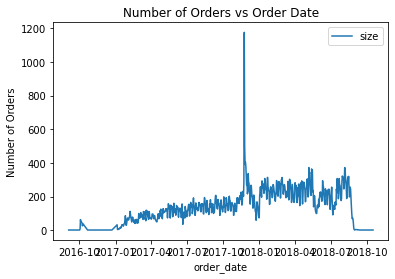

In [7]:
orders_dataset['order_purchase_timestamp'] = orders_dataset['order_purchase_timestamp'].astype('datetime64[ns]')

orders_dataset['order_date'] = orders_dataset['order_purchase_timestamp'].dt.date
grouped_oreders_by_date = orders_dataset.groupby('order_date',as_index=False)['order_id'].size()


grouped_oreders_by_date.plot(x='order_date',y='size')


plt.title("Number of Orders vs Order Date")
plt.ylabel("Number of Orders")

plt.show()

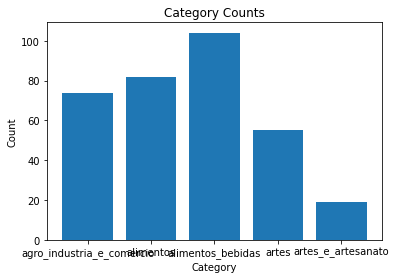

In [10]:
# Group the data by category and count the number of entries in each category
grouped_oreders_by_category = product_df.groupby('product_category_name').size().reset_index(name='count')
grouped_oreders_by_category.sort_values(by='count', ascending=False)


# Top 5 Category
grouped_oreders_by_category = grouped_oreders_by_category.head()

# Extract the category names and counts
categories = grouped_oreders_by_category['product_category_name'].tolist()
counts = grouped_oreders_by_category['count'].tolist()


plt.bar(categories, counts)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')

plt.show()